In [167]:
import pandas as pd
path = r"C:\Users\USER\Desktop\사용할만한 csv파일\마지막 2008년+2009+2010년 남,여 csv파일.CSV"
data = pd.read_csv(path)
print(data.shape[1])

90


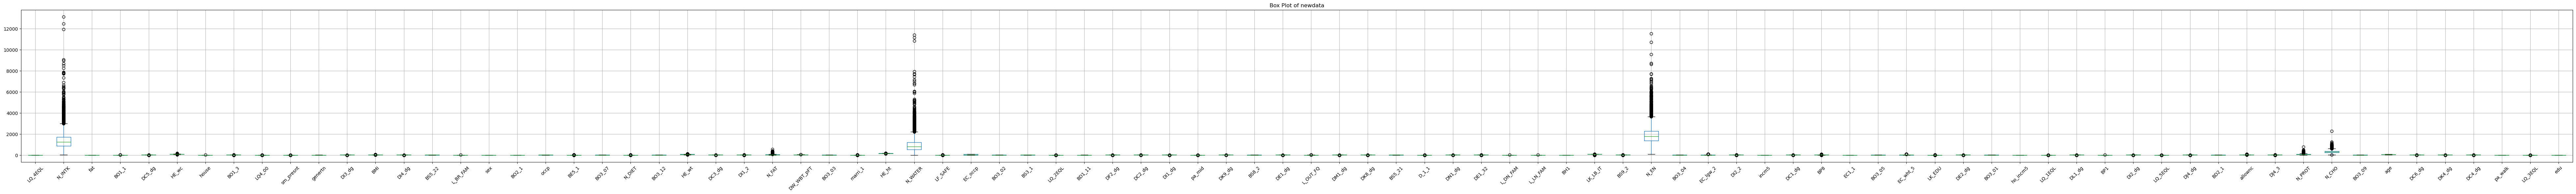

In [168]:
import matplotlib.pyplot as plt

# 이상치 확인을 위한 상자 그림(Box Plot)
plt.figure(figsize=(100 ,6))  # 그래프의 크기 설정
pd.DataFrame(data).boxplot()  # 각 열에 대한 상자 그림 생성
plt.xticks(rotation=45)  # x축 레이블 회전
plt.title('Box Plot of newdata')  # 그래프 제목 설정
plt.show()  # 그래프 출력

In [169]:
import numpy as np

# 선택한 특성들만 추출
selected_features = ['N_EN', 'N_WATER', 'N_INTK']
data_selected = data[selected_features]

# Z-점수 계산
z_scores = np.abs((data_selected- data_selected.mean()) / data_selected.std())

# 이상치로 판단할 임계값 설정 (일반적으로 3을 사용)
threshold = 3

# 이상치 탐지
outliers = np.where(np.any(z_scores > threshold, axis=1))

# 이상치가 있는 행의 인덱스 출력 (겹치는 행은 중복 제거)
outlier_rows = np.unique(outliers[0])
print("Rows with outliers:", len(outlier_rows))


Rows with outliers: 359


In [170]:
# 이상치가 있는 행들의 인덱스를 가져옴
outlier_rows = np.unique(outliers[0])

# 이상치가 있는 행들을 X 데이터프레임에서 삭제
data= data.drop(outlier_rows)


In [171]:
data.loc[:, 'fat'] = data.loc[:, 'fat'].apply(lambda x: 1 if x > 1 else 0)

# data = data[['BMI', 'HE_wc', 'sex', 'N_EN', 'N_PROT', 'L_OUT_FQ', 
#           'HE_ht', 'BO1_1', 'BO3_01', 'BS3_1', 'DW_WBT_pFT','fat']]

Y = data[['DW_WBT_pFT','fat','sex']]
X = data[['BMI', 'HE_wc', 'sex', 'N_EN', 'N_PROT', 'L_OUT_FQ', 
          'HE_ht', 'BO1_1', 'BO3_01', 'BS3_1']]

In [172]:
data.loc[:, 'fat'] = data.loc[:, 'fat'].apply(lambda x: 1 if x > 1 else 0)

data = data[['BMI', 'HE_wc', 'sex', 'N_EN', 'N_PROT', 'L_OUT_FQ', 
          'HE_ht', 'BO1_1', 'BO3_01', 'BS3_1', 'DW_WBT_pFT','fat']]

Y = data[['DW_WBT_pFT','fat','sex']]
X = data[['BMI', 'HE_wc', 'sex', 'N_EN', 'N_PROT', 'L_OUT_FQ', 
          'HE_ht', 'BO1_1', 'BO3_01', 'BS3_1']]

In [173]:
def determine_fat(row):
    if row['sex'] == 1:
        if row['DW_WBT_pFT'] < 22.5:
            return 0
        elif row['DW_WBT_pFT']>=22.5 and row['DW_WBT_pFT']<24.8:
            return 1
        else:
            return 2
    
    
    else:
        if row['DW_WBT_pFT'] < 34.3:
            return 0
        elif row['DW_WBT_pFT']>=34.3 and row['DW_WBT_pFT']<36.49:
            return 1
        else:
            return 2
    
def bmi_fat(row):
    if row['BMI'] < 22.9:
        return 0
    else:
        return 1

In [174]:
#outlier 제거
from sklearn.cluster import DBSCAN

# DBSCAN 객체 생성 및 학습 수행. 
dbscan = DBSCAN(eps=0.0009, min_samples=430, metric='cosine')
# 차원이 크기에 cosine 거리 사용

dbscan_labels = dbscan.fit_predict(data)

data['dbscan_cluster'] = dbscan_labels

# 이상치는 -1로 표기됨
outliers_df = data[data['dbscan_cluster'] == -1]
print(len(outliers_df))

217


In [175]:
data[data["dbscan_cluster"] == 1]
data = data[data['dbscan_cluster'] != -1]
data = data.drop('dbscan_cluster', axis=1)

In [176]:
Y = data[['DW_WBT_pFT','fat','sex','BMI']]
X = data[['BMI', 'HE_wc', 'sex', 'N_PROT', 'L_OUT_FQ',
          'HE_ht', 'BO1_1', 'BO3_01', 'BS3_1','N_EN',]]

attribute_names = X.columns.tolist()

In [177]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 학습 데이터셋에 대해 스케일링 적용
X = scaler.fit_transform(X)

# 테스트 데이터셋에 대해 스케일링 적용
# X_test = scaler.transform(X_test)

In [178]:
def determine_fat(row):
    if row['sex'] == 1:
        if row['pred_DW_WBT_pFT'] < 22.5:
            return 0
        elif row['pred_DW_WBT_pFT']>=22.5 and row['pred_DW_WBT_pFT']<24.8:
            return 1
        else:
            return 2
    
    
    else:
        if row['pred_DW_WBT_pFT'] < 34.3:
            return 0
        elif row['pred_DW_WBT_pFT']>=34.3 and row['pred_DW_WBT_pFT']<36.49:
            return 1
        else:
            return 2
    
def bmi_fat(row):
    if row['BMI'] < 22.9:
        return 0
    else:
        return 1        
        

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

regressor = LinearRegression()
score= 0
fat_acc = 0
output = pd.DataFrame()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)   

while (score < 0.72 or fat_acc < 0.63):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)   
    # Train the model
    regressor.fit(X_train, Y_train['DW_WBT_pFT'])
    
    # Apply the model to the test data
    y_pred = regressor.predict(X_test)
    score = regressor.score(X_test, Y_test["DW_WBT_pFT"])
    Y_test["pred_DW_WBT_pFT"] = y_pred
    X_test = pd.DataFrame(X_test, columns=attribute_names)
    # Create 'new_fat' column in the training data
    Y_test['new_fat'] = Y_test.apply(determine_fat, axis=1)
    Y_test['BMI_fat'] = Y_test.apply(bmi_fat, axis=1)
    Y_test['pred_DW_WBT_pFT'] = y_pred
    # Calculate the accuracy of 'fat'
    fat_acc = sum(Y_test['fat'] == Y_test['new_fat']) / len(Y_test)
    print("test score:", score)
    print("fat accuracy: ", fat_acc)

test score: 0.7138350270780062
fat accuracy:  0.5972633136094675
test score: 0.7173289971710006
fat accuracy:  0.6194526627218935
test score: 0.7165681214394447
fat accuracy:  0.617603550295858
test score: 0.7107063121207357
fat accuracy:  0.6076183431952663
test score: 0.7259886587178905
fat accuracy:  0.6142751479289941
test score: 0.7218073637719573
fat accuracy:  0.6190828402366864
test score: 0.721184075194893
fat accuracy:  0.6020710059171598
test score: 0.7228542303445915
fat accuracy:  0.6024408284023669
test score: 0.7229375100705169
fat accuracy:  0.6268491124260355
test score: 0.7043349487080484
fat accuracy:  0.6079881656804734
test score: 0.7244048165977546
fat accuracy:  0.6368343195266272


c:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


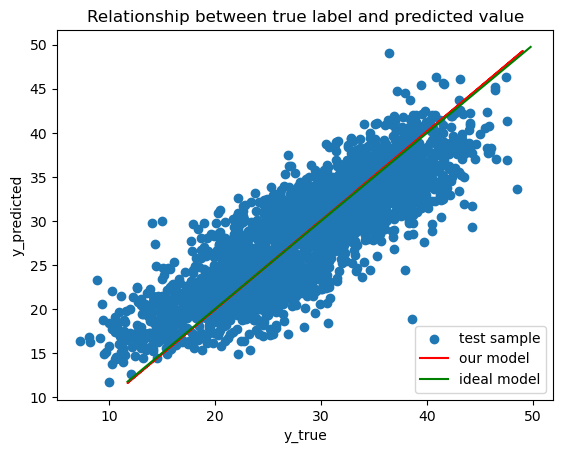

In [180]:
import matplotlib.pyplot as plt

y_pred = regressor.predict(X_test)
slope, intercept = np.polyfit(y_pred, Y_test['DW_WBT_pFT'], 1)
lower_lim = round(float(np.min(y_pred)), 2)
if lower_lim < -100:
    lower_lim = -100
upper_lim = round(float(np.max(y_pred)) + 1, 2)
if upper_lim > 100:
    upper_lim = 100
plt.title("Relationship between true label and predicted value")
plt.xlabel("y_true")
plt.ylabel("y_predicted")
plt.scatter(Y_test['DW_WBT_pFT'], y_pred, label='test sample')
plt.plot(y_pred, slope * y_pred + intercept, color='red', label="our model")
plt.plot(np.arange(lower_lim, upper_lim), np.arange(lower_lim, upper_lim), color='green', label="ideal model")
plt.legend(loc='lower right')
plt.show()